In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotly.plotly as plot

In [6]:
df=pd.concat([df,df1,df2])
df.to_csv("tweets.csv")
df.columns

Index(['Unnamed: 0', 'status_id', 'user_id', 'created_at', 'screen_name',
       'text', 'source', 'reply_to_status_id', 'reply_to_user_id',
       'reply_to_screen_name', 'is_quote', 'is_retweet', 'favourites_count',
       'retweet_count', 'country_code', 'place_full_name', 'place_type',
       'followers_count', 'friends_count', 'account_lang',
       'account_created_at', 'verified', 'lang'],
      dtype='object')

In [7]:
df=pd.read_csv("tweets.csv")
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'status_id', 'user_id', 'created_at',
       'screen_name', 'text', 'source', 'reply_to_status_id',
       'reply_to_user_id', 'reply_to_screen_name', 'is_quote', 'is_retweet',
       'favourites_count', 'retweet_count', 'country_code', 'place_full_name',
       'place_type', 'followers_count', 'friends_count', 'account_lang',
       'account_created_at', 'verified', 'lang'],
      dtype='object')

In [8]:
df.reset_index(drop=True)
df=df["text"]
df.head()

0    अरे कोई इन जाहिल गवारों को समझाए अगर ये (ईश्वर...
1    #जबलपुर 9 साल का मासूम कोरोना पॉजिटिव है। अकेल...
2    Interesting Read. A Four point strategy beyond...
3    #iamvipinsahu @iamvipinsahu #vipin_sahu #vipin...
4    (#COVID19) #कोरोना वैश्विक महामारी से संबंधित ...
Name: text, dtype: object

In [9]:
df.reset_index(drop=True,inplace=True)
df=pd.DataFrame(df)

In [11]:
df.head(11)

,text
0,अरे कोई इन जाहिल गवारों को समझाए अगर ये (ईश्वर...
1,#जबलपुर 9 साल का मासूम कोरोना पॉजिटिव है। अकेल...
2,Interesting Read. A Four point strategy beyond...
3,#iamvipinsahu @iamvipinsahu #vipin_sahu #vipin...
4,(#COVID19) #कोरोना वैश्विक महामारी से संबंधित ...
5,@Imamofpeace China sneezed - world freezed.\n\...
6,"The poor in India are starving, the public is ..."
7,We are not stuck at home we are safe at home.....
8,इटली में अबतक 1000 फादर मर चुके हैं और ये लोग ...
9,गौर करोगे तो फर्क दिखेगा...\nपत्थर होते होंगे ...


In [12]:
pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


In [13]:
from textblob import TextBlob

In [14]:
l=[]
def analyzer(input_text):
    
    score = TextBlob(input_text).sentiment.polarity
   
    return score


In [15]:
import re
def clean(text):
        pattern = re.sub("https://t.co/", "", text)
        return pattern

In [16]:
df['textblob_sent'] = df["text"].apply(analyzer)
df["text"]=df["text"].apply(clean)
df.head(1)

,text,textblob_sent
0,अरे कोई इन जाहिल गवारों को समझाए अगर ये (ईश्वर...,0.0


In [17]:
count_11=0
count_0=0
count_1=0
for i in df["textblob_sent"]:
    if i<0:
        count_11+=1
    if i==0:
        count_0+=1
    else:
        count_1+=1

In [18]:
x=[count_0,count_1,count_11]
tot=count_0+count_1+count_11
count_0_per=(count_0/tot)*100
count_1_per=(count_1/tot)*100
count_11_per=(count_11/tot)*100
print(count_0_per,count_1_per,count_11_per)

53.609239653512994 37.15110683349375 9.239653512993263


In [19]:
count_11

2304

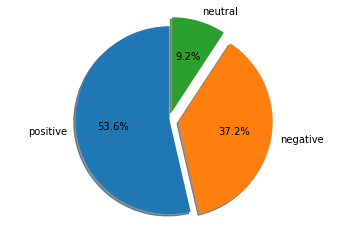

In [20]:
labels="positive","negative","neutral"
sizes=[count_0_per,count_1_per,count_11_per]
explode = (0, 0.1, 0.1)
fig,ax=plt.subplots()
ax.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax.axis("equal")
plt.show()       

Text(0.5, 1.0, 'Sentiment bar chart')

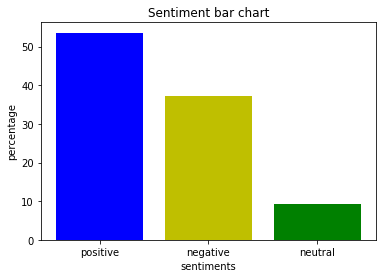

In [21]:
plt.bar(labels,sizes,align="center",alpha=1,color=["b","y","g"])
plt.ylabel('percentage')
plt.xlabel("sentiments")
plt.title('Sentiment bar chart')

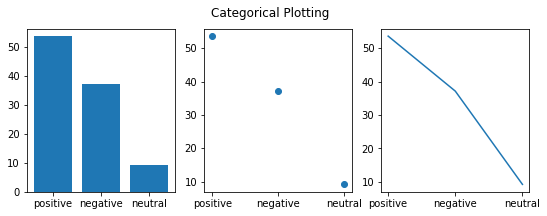

In [22]:

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(labels, sizes)
plt.subplot(132)
plt.scatter(labels, sizes)
plt.subplot(133)
plt.plot(labels, sizes)
plt.suptitle('Categorical Plotting')
plt.show()


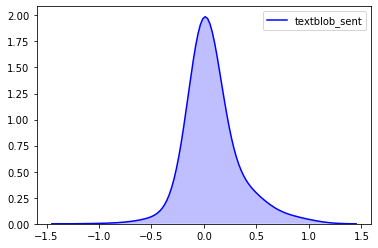

In [23]:
import seaborn as sns
for col in 'x':
    sns.kdeplot(df["textblob_sent"], shade=True,color="b",bw=.15)

In [24]:
text = " ".join(review for review in df["text"])

In [26]:
pip install WordCloud

     |████████████████████████████████| 364 kB 3.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


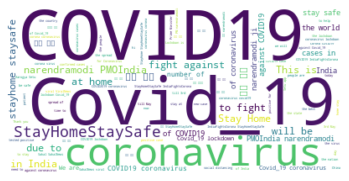

In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords.update(["thi","00","ha","amp","OO","@"])


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

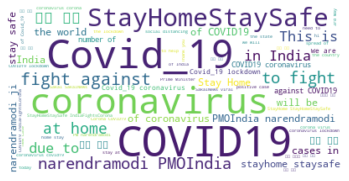

In [28]:
wordcloud = WordCloud(stopwords=stopwords,max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

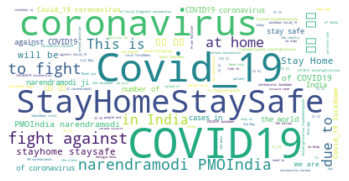

In [29]:
wordcloud = WordCloud(stopwords=stopwords,max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


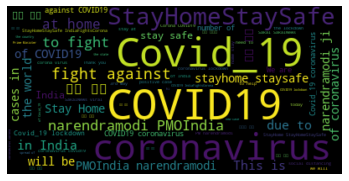

In [32]:
wordcloud = WordCloud(stopwords=stopwords,max_font_size=50, max_words=100, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()